# This is a notebook for querying the Merged T&S instance for the 1.0.0 Beacon release.

-   You can run each cell individually by pressing "shift + enter".
-   For more information, questions, bugs, please contact us on Slack:
    -   https://join.slack.com/t/beacontechnic-wwa5548/shared_invite/zt-2dp1vv56r-tj_KFac0sAKNuAgUKPPDRg.

# Documentation for querying Beacon can be found here:
- https://maris-development.github.io/beacon/docs/1.0.1/query-docs/querying/json.html

#### In order to get access to the Beacon endpoint, you need to fill in your unique personal token between the " " in the cell below.


In [ ]:
TOKEN = ""
BEACON_INSTANCE_URL = "https://beacon-wb1-ts.maris.nl"

In [6]:
# Installing the required libraries
%pip install requests
%pip install pandas
%pip install matplotlib
%pip install xarray
%pip install netCDF4
%pip install pandas
%pip install --upgrade cartopy
%pip install scipy
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Import the required packages


In [7]:
import requests
import json
from io import BytesIO
import xarray as xr
import datetime
import pandas as pd
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import warnings

### Beacon Status Check


In [ ]:
response = requests.get(
    f"{BEACON_INSTANCE_URL}/api/health",
    headers={"Authorization": f"Bearer {TOKEN}"},
)
if response.status_code == 200:
    print("Beacon is up and running.")
else:
    print("Beacon is down or not reachable.")
    exit()

In [8]:
responseinfo = requests.get(f"{BEACON_INSTANCE_URL}/api/query/available-columns", headers = {"Authorization" : f"Bearer {TOKEN}"}) 
params = responseinfo.json()

#### Below you can search through the available columns by entering text between the brackets of search_columns(" ").


In [9]:
def search_columns(search_term):
    search_term = search_term.lower()
    matches = [col for col in params if search_term in col.lower()]
    
    if matches:
        print("Matching columns:")
        for match in matches:
            print(match)
    else:
        print("No matching columns found.")

search_columns("temp") #Enter your search term here

Matching columns:
TEMPPR01
TEMPPR01.sdn_parameter_urn
TEMPPR01.sdn_uom_urn
TEMPPR01.long_name
TEMPPR01.units
TEMPPR01_SEADATANET_QC
TEMPST01
TEMPST01.sdn_parameter_urn
TEMPST01.sdn_uom_urn
TEMPST01.long_name
TEMPST01.units
TEMPST01_SEADATANET_QC
TEMPST02
TEMPST02.sdn_parameter_urn
TEMPST02.sdn_uom_urn
TEMPST02.long_name
TEMPST02.units
TEMPST02_SEADATANET_QC
TEMPRTNX
TEMPRTNX.sdn_parameter_urn
TEMPRTNX.sdn_uom_urn
TEMPRTNX.long_name
TEMPRTNX.units
TEMPRTNX_SEADATANET_QC
TEMPS901
TEMPS901.sdn_parameter_urn
TEMPS901.sdn_uom_urn
TEMPS901.long_name
TEMPS901.units
TEMPS901_SEADATANET_QC
TEMPP901
TEMPP901.sdn_parameter_urn
TEMPP901.sdn_uom_urn
TEMPP901.long_name
TEMPP901.units
TEMPP901_SEADATANET_QC
TEMPTC01
TEMPTC01.sdn_parameter_urn
TEMPTC01.sdn_uom_urn
TEMPTC01.long_name
TEMPTC01.units
TEMPTC01_SEADATANET_QC
TEMPDTNX
TEMPDTNX.sdn_parameter_urn
TEMPDTNX.sdn_uom_urn
TEMPDTNX.long_name
TEMPDTNX.units
TEMPDTNX_SEADATANET_QC
TEMPCU01
TEMPCU01.sdn_parameter_urn
TEMPCU01.sdn_uom_urn
TEMPCU01.long

#### You can define here your input parameters


In [17]:
parameter = "COMMON_TEMPERATURE" #column name 
mindate = "2003-01-01" #yyyy-mm-dd
maxdate = "2005-01-01" #yyyy-mm-dd
minlon = -180
maxlon = 180
minlat = -90
maxlat = 90
mindepth = 0
maxdepth = 10

create_netcdf = True #True or False
create_parquet = True #True or False

#### This will create the query body based on your input parameters, you can add other "query_parameters" and "filters" to suit your needs.

-   For more query examples and explanations, you can take a look at https://maris-development.github.io/beacon/.


In [18]:
query = {
    "query_parameters": [
            {
                "column_name": parameter,
            },
            {
                "column_name": "COMMON_TIME",
                "alias": "TIME"
            },
            {
                "column_name": "COMMON_DEPTH",
                "alias": "DEPTH"
            },
            {
                "column_name": "COMMON_LONGITUDE",
                "alias": "LONGITUDE"
            },
            {
                "column_name": "COMMON_LATITUDE",
                "alias": "LATITUDE"
            },
            {
                "column_name": "SOURCE_BDI",
            },
                                    {
                "column_name": "SOURCE_BDI_DATASET_ID",
            },
        ],
        "filters": [
            {
                "for_query_parameter": "TIME",
                "min": f"{mindate}T00:00:00",
                "max": f"{maxdate}T00:00:00",
            },
            {
                "for_query_parameter": "DEPTH",
                "min": mindepth,
                "max": maxdepth
            },
            {
                "for_query_parameter": "LONGITUDE",
                "min": minlon,
                "max": maxlon
            },
            {
                "for_query_parameter": "LATITUDE",
                "min": minlat,
                "max": maxlat
            },
                        {
                "for_query_parameter": parameter,
                "min": -2,
                "max": 40
            },
            {
                "is_not_null": {
                    "for_query_parameter": parameter,
                }
            },
            {
                    "for_query_parameter": "SOURCE_BDI",
                    "eq": "BEACON_SEADATANET"
            }
        ],
        "output": {
            "format": "parquet"
        }
}

#### This is the post request that is sent to Beacon with the above specified body.


In [19]:
response = requests.post(f"{BEACON_INSTANCE_URL}/api/query", json.dumps(query), headers = {
    "Authorization" : f"Bearer {TOKEN}",
    "Content-type": "application/json"
})

if response.status_code != 200:
    print(response.text)
    print("An error occurred while processing your request. Please check your input fields and try again.")
    
# Save the response to a BytesIO object
bytes_io = BytesIO(response.content)
df = pd.read_parquet(bytes_io)
# We have to convert the time column from seconds 1970 to datetime64[ns] type
df['TIME'] = pd.to_datetime(df['TIME'], unit='s')
df

,COMMON_TEMPERATURE,TIME,DEPTH,LONGITUDE,LATITUDE,SOURCE_BDI,SOURCE_BDI_DATASET_ID
0,27.820,2003-05-23 02:04:12,2.0,-50.62653,5.67718,BEACON_SEADATANET,000486_CFPOINT_XCTD_3369698_V0
1,27.800,2003-05-23 02:04:12,3.0,-50.62653,5.67718,BEACON_SEADATANET,000486_CFPOINT_XCTD_3369698_V0
2,28.015,2003-05-23 02:04:12,4.0,-50.62653,5.67718,BEACON_SEADATANET,000486_CFPOINT_XCTD_3369698_V0
3,28.320,2003-05-23 02:04:12,5.0,-50.62653,5.67718,BEACON_SEADATANET,000486_CFPOINT_XCTD_3369698_V0
4,28.420,2003-05-23 02:04:12,6.0,-50.62653,5.67718,BEACON_SEADATANET,000486_CFPOINT_XCTD_3369698_V0
...,...,...,...,...,...,...,...
2162860,18.400,2005-01-01 00:00:00,0.0,11.78900,42.09500,BEACON_SEADATANET,000120_CFPOINT_300438_V0
2162861,18.310,2005-01-01 00:00:00,0.0,15.41100,37.74000,BEACON_SEADATANET,000120_CFPOINT_300436_V0
2162862,11.810,2005-01-01 00:00:00,0.0,8.28700,39.16400,BEACON_SEADATANET,000120_CFPOINT_300434_V0
2162863,13.490,2005-01-01 00:00:00,0.0,16.86600,41.13900,BEACON_SEADATANET,000120_CFPOINT_300285_V0


In [21]:
len(df['SOURCE_BDI_DATASET_ID'].unique())

70415

### Create output files (NetCDF and/or Parquet) with the results of the query

In [13]:
if not os.path.exists("./Beacon_V1.0.0_Output"):
    os.makedirs("Beacon_V1.0.0_Output")

def generate_file_name(parameter, mindate, maxdate, minlon, maxlon, minlat, maxlat, mindepth, maxdepth, extension):
    regionname = f"[{minlat}_{minlon}]_[{maxlat}_{maxlon}]" 
    file_name = f"{parameter}_{regionname}_{mindate}_{maxdate}_[{mindepth}_{maxdepth}m].{extension}"
    return file_name

# Save the DataFrame to file formats
if create_parquet:
    parquet_file_name = generate_file_name(parameter, mindate, maxdate, minlon, maxlon, minlat, maxlat, mindepth, maxdepth, "parquet")
    df.to_parquet(f"./Beacon_V1.0.0_Output/{parquet_file_name}", index=False)
    print(f"Data saved to {parquet_file_name}")
    
if create_netcdf:
    netcdf_file_name = generate_file_name(parameter, mindate, maxdate, minlon, maxlon, minlat, maxlat, mindepth, maxdepth, "nc")
    xr_data = df.to_xarray()
    xr_data.to_netcdf(f"./Beacon_V1.0.0_Output/{netcdf_file_name}")
    print(f"Data saved to {netcdf_file_name}")

Data saved to COMMON_TEMPERATURE_[-90_-180]_[90_180]_2010-01-01_2011-01-01_[0_10m].parquet


KeyboardInterrupt: 

#### Plotting of results


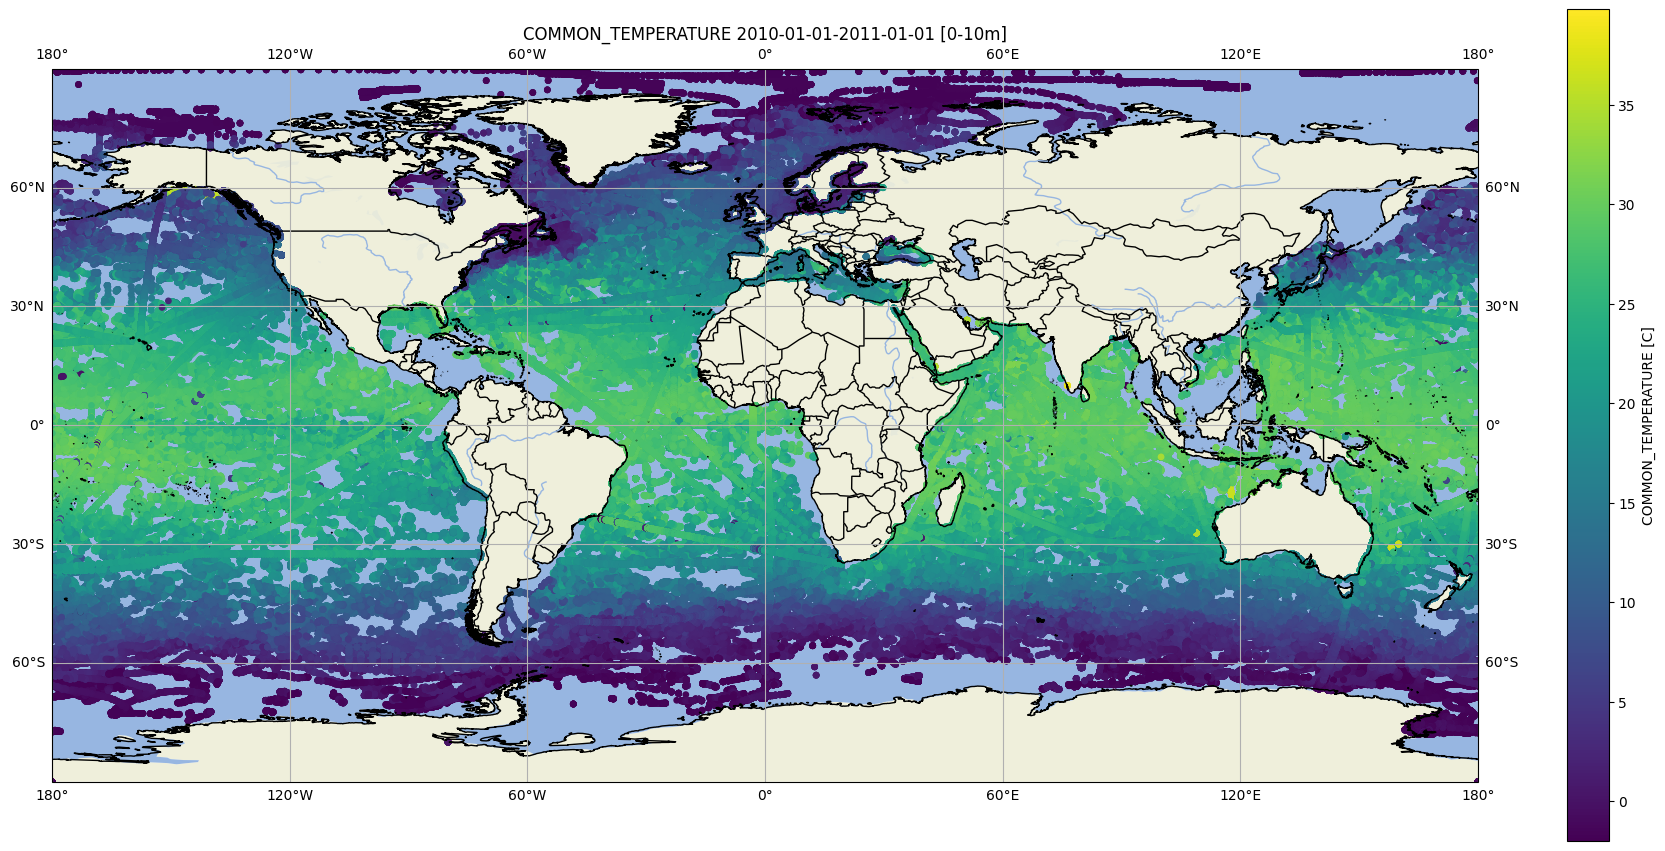

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning, module="cartopy")
fig = plt.figure(figsize=(23, 18))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())  # (west, east, south, north)

ax.coastlines(resolution="10m")
ax.gridlines(draw_labels=True)

sc = ax.scatter(df["LONGITUDE"], df["LATITUDE"], c=df[parameter], cmap="viridis", s=15, transform=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)     
ax.add_feature(cfeature.BORDERS)   
ax.add_feature(cfeature.LAKES, alpha=0.1) 

cbar = plt.colorbar(sc, ax=ax, orientation="vertical", shrink=0.6, label="Value Set 1")
cbar.set_label(f"{parameter} [C]")

plt.title(f"{parameter} {mindate}-{maxdate} [{mindepth}-{maxdepth}m]")

plt.show()